In [60]:
# imports
from collections import Counter
import re

In [61]:
# read data
# with open("../Data/Wikipedia300K/Wikipedia300K.txt", "r", encoding="utf-8") as file:
#     text = file.read()

with open("../Data/Wikipedia1M/Wikipedia1M.txt", "r", encoding="utf-8") as file:
    text = file.read()

In [62]:
# clean text (remove all non-ascii characters keep umlauts)

# first try
# text_cleaned = " ".join([c for c in text if ord(c) < 128 or c in "äöüÄÖÜß"])

# better solution
text_cleaned = re.sub(r"[^a-zA-Z0-9äöüÄÖÜß\.,!\?]", " ", text)

print("Unique characters: ", sorted(set(text)))
print("Unique characters: ", sorted(set(text_cleaned)))

Unique characters:  ['\n', ' ', '!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '~', '¡', '¢', '£', '¥', '§', '¨', 'ª', '«', '¬', '®', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'À', 'Á', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Í', 'Î', 'Ï', 'Ð', 'Ñ', 'Ò', 'Ó', 'Ô', 'Õ', 'Ö', '×', 'Ø', 'Ú', 'Û', 'Ü', 'Þ', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'Ā', 'ā', 'ă', 'ą', 'Ć', 'ć', 'ĉ', 'Ċ', 'ċ', 'Č', 'č', 'Ď', 'ď', 'Đ', 'đ', 'Ē', 'ē', 'ĕ', 'Ė', 'ė', 'ę', 'Ě', 'ě', 'ĝ', 'Ğ', 'ğ', 'Ġ'

In [63]:
# example cleaned text
length = 200
print(text[0:length])
print("\n")
print(text_cleaned[0:length])

; 0,7 Prozent stammen von zwei oder mehr Ethnien ab.
"0 %" bedeutet, dass der Strahlengang frei ist, der Füllstand also unter der Grenze liegt.
; 0 kB), Video der ICTY-Sitzung vom 16. Juni 2005, http:


  0,7 Prozent stammen von zwei oder mehr Ethnien ab.  0    bedeutet, dass der Strahlengang frei ist, der Füllstand also unter der Grenze liegt.   0 kB , Video der ICTY Sitzung vom 16. Juni 2005, http 


In [64]:
# count words case insensitive
words = text_cleaned.lower().split()
word_counts = Counter(words)
print(word_counts.most_common(10))


# token count
print("Number of tokens: ", len(words))

[('der', 556063), ('die', 517176), ('und', 416137), ('in', 306470), ('von', 193623), ('den', 171477), ('im', 164024), ('das', 155305), ('mit', 148090), ('des', 142316)]
Number of tokens:  15587991


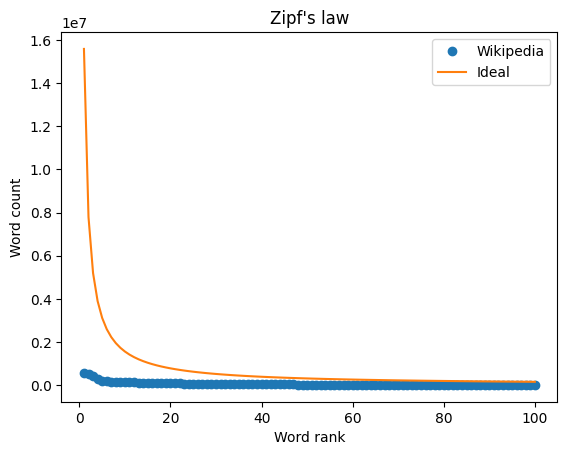

In [65]:
#Plot the Zipf's law curve for the 100 most frequent words.

# imports
import matplotlib.pyplot as plt
import numpy as np

# get top 100 words
top_100 = word_counts.most_common(100)

# get word counts
counts = [count for word, count in top_100]

# get word ranks
ranks = np.arange(1, len(counts) + 1)

# get normfactor
normfactor = len(words)

# calculate ideal counts
ideal_counts = [normfactor / rank for rank in ranks]

#####################################################################################
# Plot the ideal Zipf's law curve with p(n) = 1/n. Normfactor is the number of tokens.
plt.plot(ranks, counts, "o", label="Wikipedia")
plt.plot(ranks, ideal_counts, label="Ideal")
plt.xlabel("Word rank")
plt.ylabel("Word count")
plt.title("Zipf's law")
plt.legend()
plt.show()

In [74]:
# Number of distinct words in a text as function of text length
# imports
import matplotlib.pyplot as plt
import numpy as np

# get text lengths
text_lengths = np.arange(1000, 1000000, 1000)
K = 40 # 10 - 100
ß = 0.5 # 0.4 - 0.6

# distinct words for each text length

distinct_words = [Counter(text_cleaned[0:length].lower().split()) for length in text_lengths]


V = K*text_lengths**ß

# plot
plt.plot(text_lengths, distinct_words, label="Wikipedia")
plt.plot(text_lengths, V, label="V")
plt.xlabel("Text length")
plt.ylabel("Number of distinct words")
plt.title("Number of distinct words in a text as function of text length")
plt.legend()
plt.show()

In [73]:
print(distinct_words)

[121, 230, 323, 410, 490, 581, 658, 737, 818, 904, 985, 1061, 1131, 1211, 1278, 1354, 1432, 1516, 1598, 1674, 1744, 1812, 1881, 1964, 2042, 2111, 2187, 2250, 2310, 2383, 2450, 2517, 2579, 2645, 2703, 2759, 2818, 2887, 2950, 3007, 3075, 3124, 3182, 3243, 3303, 3371, 3432, 3487, 3540, 3597, 3649, 3706, 3762, 3821, 3878, 3931, 3985, 4036, 4086, 4133, 4186, 4230, 4278, 4325, 4372, 4418, 4460, 4501, 4545, 4598, 4644, 4687, 4742, 4781, 4822, 4869, 4906, 4954, 4999, 5047, 5091, 5144, 5192, 5237, 5277, 5309, 5355, 5391, 5431, 5479, 5526, 5556, 5600, 5646, 5689, 5733, 5773, 5812, 5858, 5906, 5948, 5989, 6037, 6078, 6127, 6169, 6204, 6254, 6300, 6349, 6379, 6424, 6468, 6513, 6563, 6597, 6637, 6671, 6710, 6748, 6799, 6840, 6883, 6924, 6966, 6996, 7040, 7084, 7130, 7176, 7214, 7250, 7284, 7320, 7365, 7405, 7440, 7478, 7518, 7559, 7600, 7641, 7687, 7729, 7763, 7805, 7841, 7879, 7926, 7968, 8003, 8042, 8083, 8119, 8155, 8199, 8245, 8286, 8328, 8371, 8417, 8460, 8497, 8537, 8575, 8623, 8657, 8701, 87